In [1]:
# open pert_level_raw_expression.csv as dataframe 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pert_level_data = pd.read_csv('pert_level_raw_expression.csv')
pert_level_data

,Name,End Time,Runtime,Tags,test/adjusted_mse,test/num_de_genes,data.eval_pert,data.split,data.fm
0,happy-frost-214,2024-08-08T16:36:53.000Z,37,"AHR, eval, norman, raw_expression, replicate_1...",3.874356e-03,20,AHR,0.7,raw_expression
1,fluent-sunset-163,2024-08-08T14:29:24.000Z,78,"KLF1, eval, norman, raw_expression, replicate_...",2.178955e-03,20,KLF1,0.0,raw_expression
2,ethereal-butterfly-160,2024-08-08T14:29:23.000Z,78,"SNAI1, eval, norman, raw_expression, replicate...",1.757914e-03,20,SNAI1,0.0,raw_expression
3,sleek-fire-154,2024-08-08T14:29:21.000Z,76,"ZBTB1, eval, norman, raw_expression, replicate...",1.533885e-03,20,ZBTB1,0.0,raw_expression
4,lunar-puddle-153,2024-08-08T14:29:25.000Z,80,"COL2A1, eval, norman, raw_expression, replicat...",1.392688e-03,20,COL2A1,0.0,raw_expression
5,ancient-bird-174,2024-08-08T14:33:35.000Z,102,"FOSB, eval, norman, raw_expression, replicate_...",1.078222e-03,20,FOSB,0.0,raw_expression
6,fluent-breeze-154,2024-08-08T14:29:23.000Z,78,"CBFA2T3, eval, norman, raw_expression, replica...",1.035938e-03,20,CBFA2T3,0.0,raw_expression
7,trim-plant-143,2024-08-08T14:29:31.000Z,87,"SLC4A1, eval, norman, raw_expression, replicat...",1.002711e-03,20,SLC4A1,0.0,raw_expression
8,royal-night-151,2024-08-08T14:29:25.000Z,81,"SAMD1, eval, norman, raw_expression, replicate...",9.845574e-04,20,SAMD1,0.0,raw_expression
9,wise-microwave-209,2024-08-08T14:37:38.000Z,99,"BAK1, eval, norman, raw_expression, replicate_...",8.429040e-04,15,BAK1,0.0,raw_expression


In [10]:
# split the pert_level_data based on the data.split column into two separate dataframes, one for 0.0 and another for 0.7 
pert_level_data_0 = pert_level_data[pert_level_data['data.split'] == 0.0]
pert_level_data_7 = pert_level_data[pert_level_data['data.split'] == 0.7]
pert_level_data_0_grouped = pert_level_data_0.groupby(['data.eval_pert', 'data.fm'])['test/adjusted_mse'].mean().reset_index()
pert_level_data_7_grouped = pert_level_data_7.groupby(['data.eval_pert', 'data.fm'])['test/adjusted_mse'].mean().reset_index()
pert_level_data_0_grouped

,data.eval_pert,data.fm,test/adjusted_mse
0,AHR,raw_expression,-0.000326
1,BAK1,raw_expression,0.000483
2,BCORL1,raw_expression,0.000441
3,CBFA2T3,raw_expression,0.001036
4,CEBPB,raw_expression,-0.001416
5,CELF2,raw_expression,0.000140
6,COL1A1,raw_expression,-0.000379
7,COL2A1,raw_expression,0.000697
8,CSRNP1,raw_expression,0.000348
9,ELMSAN1,raw_expression,0.000115


In [11]:
pivot_0 = pert_level_data_0_grouped.pivot(index="data.eval_pert", columns="data.fm", values="test/adjusted_mse")
pivot_7 = pert_level_data_7_grouped.pivot(index="data.eval_pert", columns="data.fm", values="test/adjusted_mse")
pivot_0

data.fm,raw_expression
data.eval_pert,
AHR,-0.000326
BAK1,0.000483
BCORL1,0.000441
CBFA2T3,0.001036
CEBPB,-0.001416
CELF2,0.000140
COL1A1,-0.000379
COL2A1,0.000697
CSRNP1,0.000348


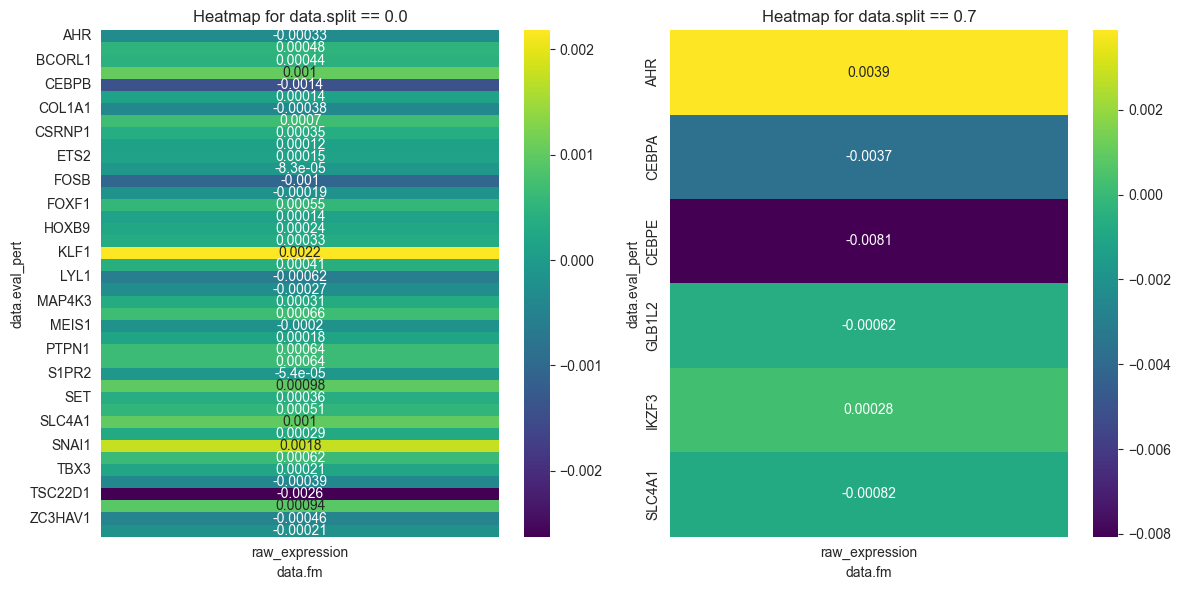

In [13]:
# Plot heatmaps
plt.figure(figsize=(12, 6))

# Heatmap for pert_level_data_0
plt.subplot(1, 2, 1)
sns.heatmap(pivot_0, annot=True, cmap="viridis")
plt.title("Heatmap for data.split == 0.0")

# Heatmap for pert_level_data_7
plt.subplot(1, 2, 2)
sns.heatmap(pivot_7, annot=True, cmap="viridis")
plt.title("Heatmap for data.split == 0.7")

plt.tight_layout()
plt.show()